## Multi-Layer Preceptrons

This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and Ben Sattleberg with updates by Ross Beveridge

Last Update 4/07/2022


*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Neural Networks

Neural networks are models inspired by the workings of the human brain and the ability of brains to learn and adapt.  Neural networks build on the foundations of humble linear models like the perceptron and logistic regression. If you are seeking a bit more of an overview consider the [Connectionism Page](https://en.wikipedia.org/wiki/Connectionism) on Wikipedia for additional context. 

### The XOR problem

Linear models do not always give acceptable levels of accuracy.  As a toy example consider the XOR problem, which is a canonical example of a problem that is not linearly separable:

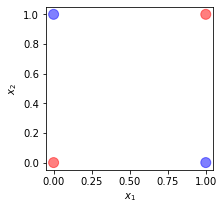

In [22]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([1, 0, 0, 1])

plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1], c=y, s=100, alpha=0.5, cmap='bwr');
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

There is no line we can draw in the plane to successfully seperate the positive and negative examples.

### Recap: the perceptron

The perceptron was our first linear classifier.  It used the following rule:

$$h(\textbf{x}) = \text{step}(\textbf{w}^T \textbf{x} + b),$$

where $\text{step}$ refers to the step function

$$\text{step}(x) = \begin{cases} 1 & x \geq 0 \\ 0 & x < 0. \end{cases} $$

Previously we used the sign function because for convenience we used $\pm 1$ as the labels.

Think of the perceptron as a neural network with a single computational unit.  That neuron collects its input from the *input layer*, which also includes a constant unit that represents the bias.  The connections of the neuron have weights associated with them; those connections act to multiply the inputs received over those connections resulting in $\textbf{w}^T \textbf{x} + b$ as the input received by the neuron.  Whenever the input received by the neuron exceeds a certain threshold (e.g. 0), the neuron **fires**.  This is represented by the application of the step function to the input received by the neuron.
The step function is an example of an **activation function**, which specifies the response of the neuron to the input it receives.

<img style="padding:10px;width:50%;" alt="the perceptron as a neural network" src="https://github.com/asabenhur/CS345/raw/master/notebooks/figures/perceptron.png">

*Note: Replace "f" with "h" in above figure*

Given features that are "good enough" - i.e. features that render the problem linearly separable, the perceptron can solve any classification problem. As a bit of context, recall we have already seen polynomial regression applied to the XOR problem demonstrating how even the addition of the $x_1 * x_2$ term to the feature set rendered XOR solvable as a "linear" problem.

### Multi-layer perceptrons

A multi-layer perceptron (MLP) is a classifier that consists of at least three layers of nodes:  an **input layer**, a **hidden layer** and an **output layer**.
The input layer receives the input, while each subsequent layer computes a function of the previous layer (usually nonlinear).  The output layer produces the resulting prediction of the MLP.  Here is a simple example:

<img style="padding:10px;width:50%;" alt="Simple multilayer perceptron architecture" src="https://github.com/asabenhur/CS345/raw/master/notebooks/figures/simple_network.png">

First we'll consider an architecture where each node computes a function in exactly the same way as the perceptron. Here, the two red nodes, $h_1$ and $h_2$, represent perceptrons with

$$ h_1(\textbf{x}) = \text{step}(\textbf{w}_1^\top \textbf{x} + b_1) $$
and
$$ h_2(\textbf{x}) = \text{step}(\textbf{w}_2^\top \mathbf{x} + b_2). $$

Next, $h_1$ and $h_2$ are used as inputs to another perceptron, $f$.  For this second perceptron, we'll drop the step function:

$$ f(\textbf{x}) = v_1 h_1(\textbf{x}) + v_2 h_2(\textbf{x}) + c $$
or
$$ f(\textbf{x}) = v_1 \text{step}(\textbf{w}_1^T \textbf{x} + b_1) + v_2 \text{step}(\textbf{w}_2^T \textbf{x} + b_2) + c. $$

It is useful to write this in vector-matrix form as

$$ f(\mathbf{x}) = \mathbf{v}^T \text{step} \left( W \mathbf{x} + \mathbf{b} \right) + c. $$

Here $\mathbf{b} = (b_1, b_2)^\top$ and the matrix $W$ is the result of stacking $\mathbf{w}_1$ and $\mathbf{w}_2$:

$$
W = \begin{pmatrix}
\mathbf{w}_1^\top \\
\mathbf{w}_2^\top
\end{pmatrix}
$$


As an example, here is such a multilayer perceptron that solves the XOR problem:

<img style="padding:10px;width:50%;" alt="Multilayer perceptron architecture for XOR" src="https://github.com/asabenhur/CS345/raw/master/notebooks/figures/xor_network.png">

This perceptron uses the following values for the parameters as shown in the figure:
\begin{align}
\textbf{W} &= \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \\
\textbf{b} &= \begin{pmatrix} -1.5 \\ -0.5 \end{pmatrix} \\
\textbf{v} &= \begin{pmatrix} 1 \\ -1 \end{pmatrix} \\
c &= 1.0
\end{align}

To illustrate that it indeed solves the XOR problem let's plot the decision boundary of this network:

You can verify that this multilayer perceptron computes $\mathrm{XOR}(x_1, x_2)$ and it does so by computing $(\mathrm{AND}(x_1, x_2) - \mathrm{OR}(x_1, x_2) + 1)$. 


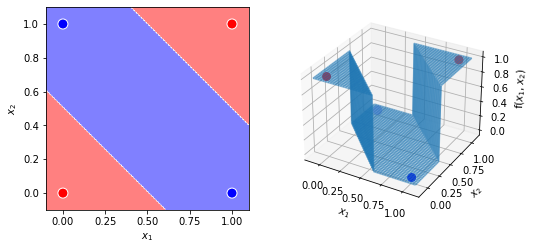

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,4))
ax  = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

W = np.array([[1, 1], [1, 1]])
b = np.array([[-1.5], [-0.5]])
v = np.array([1, -1])
c = 1

delta = 0.01
xmin=-0.1;xmax=1.1;ymin=-0.1;ymax=1.1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

xs = x_grid.reshape(-1)
ys = y_grid.reshape(-1)
x = np.vstack((xs, ys))

Z = np.dot(v, np.heaviside(np.matmul(W, x) + b, 1)) + c
Z = Z.reshape(x_grid.shape)

im = ax.imshow(Z, origin='lower',
                cmap=plt.cm.bwr, alpha=0.5, extent=(xmin,xmax,ymin,ymax) )

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([1, 0, 0, 1])

ax.scatter(X[:,0], X[:,1], c=y, s=100, cmap='bwr', edgecolors='w');
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

ax2.plot_wireframe(x_grid, y_grid, Z, alpha=0.5);
ax2.scatter(X[:,0], X[:,1], y, c=y, s=100, cmap='bwr', edgecolors='w')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('f($x_1$, $x_2$)');

## More complex architectures

The architecture described earlier, with two hidden nodes is perhaps  the simplest multi-layer neural network architecture that can be constructed.  For added complexity you can add more hidden nodes:

<img style="padding:10px;width:50%;" alt="A wider multilayer perceptron" src="https://github.com/asabenhur/CS345/raw/master/notebooks/figures/wide_network.png">

In this architecture visualization $\textbf{x}$ represents any number of inputs to the network.

The set of nodes before the output is known as the **hidden layer**.  The number of nodes in that hidden layer is known as the "width" of the network.  

Another way to allow the network to model more complex problems is to add more hidden layers to increase the "depth" of the network.  Here's an example of a network with two hidden layers:

<img style="padding:10px;width:60%;" alt="A wider multilayer perceptron" src="https://github.com/asabenhur/CS345/raw/master/notebooks/figures/deeper_network.png">

This structure of successive layers is called a **multilayer perceptron**, and is also frequently referred to as a **fully-connected feedforward neural network**.  In general we can have any number of hidden layers and each hidden layer can have any number of neurons:

<img style="padding:10px;width:70%;" alt="A wider multilayer perceptron" src="https://github.com/asabenhur/CS345/raw/master/notebooks/figures/full_network.png">

Modern neural networks can be very large both in depth and number of neurons per layer, which can add up to many parameters!

## Universal approximation

Neural networks being able to solve the XOR problem is great, but it doesn't mean they will be useful for problems in general.

It has been shown that neural networks can serve as "universal approximators", i.e. can serve to approximate any function.  Therefore they should be able to solve arbitrarily complex machine learning problems.
If you are interested, [chapter 4 of Neural networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap4.html) shows a relatively simple visual proof of this property.
It is worth noting that a network with a single hidden layer is a universal approximator given sufficient (possibly **very** large) width.

### Training a neural network

To train a network, we need a method to update its weights.   Applying the perceptron update rule will no longer work: it will successfully update weights in the final layer, but the hidden neurons don't have a sense of a "correct" or "incorrect" classification, so they cannot be updated in that way.

The method that is used instead is gradient descent.  However, the output of the perceptron which uses the step function as the "activation function" is not differentiable.  So we need to choose an alternative to the step function.

# Activation functions

As mentioned above, the activation function describes how a neuron responds to its input.
The activation function that was used most commonly from the mid 1980s until the arrival of deep learning was the sigmoid and its sibling function, *tanh*, which is essentially a rescaling of the sigmoid to have a range from -1 to 1 instead of 0 to 1.  These can be considered as smooth versions of the step function, as they have similar behavior except near zero.

A bit of ML history - [Ron Williams](https://en.wikipedia.org/wiki/Ronald_J._Williams) did some of the earliest tests revealing that back propogating responsibility for success or failure to label a sample correctly based upon sigmoid gradients would - in some cases - very nicely lead to convergence upon a set of weights useful to a multilayer neural network.

In [24]:
def sigmoid(s):
    return 1/(1+np.exp(-s))

def sigmoid_derivative(s):
    return sigmoid(s) *(1-sigmoid(s))

def step(s) :
    return s > 0

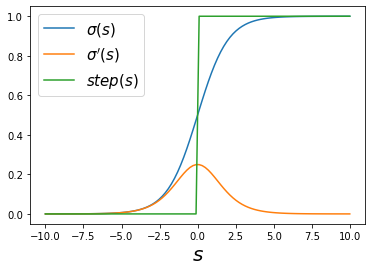

In [25]:
plt.figure(figsize=(6,4))
s = np.linspace(-10,10, 100)
plt.plot(s, sigmoid(s), label = r'$\sigma(s)$')
plt.plot(s, sigmoid_derivative(s), label = r"$\sigma'(s)$")
plt.plot(s, step(s), label = r'$step(s)$')

plt.xlabel(r"$s$", fontsize=20)
plt.legend(fontsize=15);

The sigmoid function has a severe problem: "vanishing gradients."  As you can see in the plot of the derivative, as the input to the sigmoid increases in magnitude, the derivative approaches zero very rapidly.  This means that if a hidden neuron in the network recieves a large input, the derivative to the weights resulting from that input will be very small.  This isn't typically a significant issue for small networks, but for modern networks that have many layers, it can become difficult to train the network effectively.  

With the advent of "deep learning," the activation function that is used more commonly is the Rectified Linear Unit or ReLU.  ReLU is defined as

$$ \text{ReLU}(x) = \begin{cases} x, & x \geq 0 \\ 0, & x < 0 \end{cases} $$

Its derivative is

$$ \text{ReLU}'(x) = \begin{cases} 1, & x > 0 \\ 0, & x < 0 \end{cases} $$

with the derivative at zero being somewhat arbitrary (typically a value of 0, 0.5, or 1 is chosen) due to the piecewise nature of the function.

In addition to not suffering from the vanishing gradient problem, the ReLU function is faster to evaluate.

In [26]:
def ReLU(x):
    return np.maximum(0, x)

def ReLU_derivative(x):
    dy = np.ones(x.shape)
    dy[x<0] = 0
    return dy

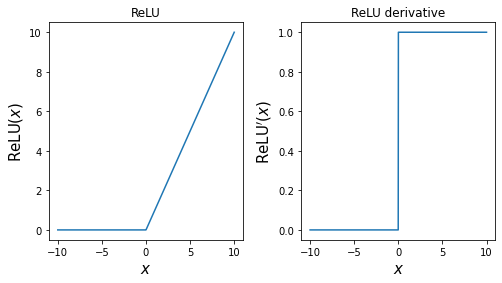

In [27]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.subplots_adjust(wspace=0.3)

x = np.linspace(-10, 10, 1000)
y = ReLU(x)

dy = ReLU_derivative(x)

ax1.plot(x, y)
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('ReLU$(x)$', fontsize=15)
ax1.set_title('ReLU')
ax2.plot(x, dy)
ax2.set_xlabel('$x$', fontsize=15)
ax2.set_ylabel("ReLU$'(x)$", fontsize=15)
ax2.set_title("ReLU derivative");

### The forward function

In feed forward neural networks the computation of the network output is often referred to as a **forward pass**.
For our simple network with a single hidden layer which has two neurons the output of the network can be written as:

$$ 
f(\textbf{x}) = v_1 \sigma \underbrace{\left(\textbf{w}_1^T \textbf{x} + b_1\right)}_{h_1(\mathbf{x})} + v_2 \sigma\underbrace{\left(\textbf{w}_2^T \textbf{x} + b_2\right)}_{h_2(\mathbf{x})} + c. 
$$

Let's express that in code using Numpy:

In [28]:
# first, create some random values for the parameters:
from numpy.random import default_rng
rng = default_rng(42)
w1 = rng.normal(0, 0.1, 2)
w2 = rng.normal(0, 0.1, 2)
b = rng.normal(0, 0.1, 2)
v = rng.normal(0, 0.1, 2)
c = rng.normal(0, 0.1, 1)[0]

Recall we still have the four corners of the 2-D unit square loaded into our data matrix X.

In [36]:
X[0],X[1]

(array([0, 0]), array([1, 0]))

In [37]:
# we'll apply the network to the second element in the dataset:
x = X[0]
h1 = ReLU(np.dot(w1, x) + b[0])
h2 = ReLU(np.dot(w2, x) + b[1])

output = v[0] * h1 + v[1] * h2 + c
output

-0.0016801157504288797

We can write that in a single line:

In [11]:
output = (v[0] * ReLU(np.dot(w1, x) + b[0]) + 
          v[1] * ReLU(np.dot(w2, x) + b[1]) + c)
output

-0.0016801157504288797

By stacking together the weight vectors of the two hidden units we can express the output more succinctly:

In [12]:
rng = default_rng(42)
W = rng.normal(0, 0.1, (2, 2))
b = rng.normal(0, 0.1, (2,1))
v = rng.normal(0, 0.1, (2,1))
c = rng.normal(0, 0.1, 1)[0]

And here is the output of the complete network using `np.dot`

In [13]:
np.dot(v.T, ReLU(np.dot(W, X.T) + b)) + c

array([[-0.00168012, -0.00168012, -0.00168012, -0.00290978]])

And alternatively the same calculation using the matrix multiplication operator:

In [14]:
v.T @ ReLU(W @ X.T + b) + c

array([[-0.00168012, -0.00168012, -0.00168012, -0.00290978]])

### Gradient Descent


Our two layer network with two hidden neurons is defined as 

$$ 
f(\textbf{x}) = v_1 \sigma(\textbf{w}_1^T \textbf{x} + b_1) + v_2 \sigma(\textbf{w}_2^T \textbf{x} + b_2) + c.
$$

where $\sigma$ refers to any activation function, not necessarily the sigmoid function.
We can express this more explicitly as:

$$ 
f(\textbf{x}) = v_1 \sigma(w_{11}x_1 + w_{12}x_2 + b_1) + v_2 \sigma(w_{21}x_1 + w_{22}x_2 + b_2) + c. 
$$


Next, we need a loss function that defines the errors of our network.  For a network with a single output we can use the squared loss, like we did in linear regression:

$$ L(\textbf{x}, y) = (f(\textbf{x}) - y)^2. $$

To be able to optimize the parameters using gradient descent, we need to compute the derivative of the loss function with respect to the parameters of the network.

First, we'll compute the derivatives with respect to the parameters of the output layer.  For example, the derivative of this with respect to $v_1$ is 

\begin{align*}
\frac{\partial L(\textbf{x}, y)}{\partial v_1} &= \frac{\partial}{\partial v_1} (f(\textbf{x}) - y)^2 \\
                                               &= 2(f(\textbf{x}) - y) * \frac{\partial}{\partial v_1} f(\textbf{x}) \qquad \text{from the chain rule} \\
                                               &= 2(f(\textbf{x}) - y) * \frac{\partial}{\partial v_1} \left(v_1 \sigma(\textbf{w}_1^T \textbf{x} + b_1) + v_2 \sigma(\textbf{w}_2^T \textbf{x} + b_2) + c\right) \qquad \text{substituting in the network definition}\\
                                               &= 2(f(\textbf{x}) - y) * \frac{\partial}{\partial v_1} v_1 \sigma(\textbf{w}_1^T \textbf{x} + b_1) \qquad \text{removing terms that don't depend on $v_1$}\\
                                               &= 2(f(\textbf{x}) - y) * \sigma(\textbf{w}_1^T \textbf{x} + b_1)
\end{align*}

The derivatives for $v_2$ and $c$ are computed similarly, so we have:

\begin{align*}
\frac{\partial L(\textbf{x}, y)}{\partial v_1} &= 2(f(\textbf{x}) - y) * \sigma(\textbf{w}_1^T \textbf{x} + b_1) \\
\frac{\partial L(\textbf{x}, y)}{\partial v_2} &= 2(f(\textbf{x}) - y) * \sigma(\textbf{w}_2^T \textbf{x} + b_2) \\
\frac{\partial L(\textbf{x}, y)}{\partial c} &= 2(f(\textbf{x}) - y)
\end{align*}

Next, we'll compute the derivatives with respect to the parameters of the hidden layer.
The derivative of the loss with respect to $w_{11}$ is

\begin{align*}
\frac{\partial L(\textbf{x}, y)}{\partial w_{11}} &= \frac{\partial}{\partial w_{11}} (f(\textbf{x}) - y)^2 \\
                                               &= 2(f(\textbf{x}) - y) * \frac{\partial}{\partial w_{11}} f(\textbf{x})\\
                                               &= 2(f(\textbf{x}) - y) * \frac{\partial}{\partial w_{11}} \left(v_1 \sigma(w_{11}x_1 + w_{12}x_2 + b_1) + v_2 \sigma(w_{21}x_1 + w_{22}x_2 + b_2) + c\right) \\
                                               &= 2(f(\textbf{x}) - y) * \frac{\partial}{\partial w_{11}} v_1 \sigma(w_{11}x_1 + w_{12}x_2 + b_1) \\
                                               &= 2(f(\textbf{x}) - y) * v_1 \frac{\partial}{\partial w_{11}}  \sigma(w_{11}x_1 + w_{12}x_2 + b_1) \\
                                               &= 2(f(\textbf{x}) - y) * v_1 * \sigma'(w_{11}x_1 + w_{12}x_2 + b_1) * x_1
\end{align*}

The derivatives for the other parameters in this layer proceeds in a similar way. Overall we have:

\begin{align*}
\frac{\partial L(\textbf{x}, y)}{\partial v_1} &= 2(f(\textbf{x}) - y) * \sigma(\textbf{w}_1^T \textbf{x} + b_1) \\
\frac{\partial L(\textbf{x}, y)}{\partial v_2} &= 2(f(\textbf{x}) - y) * \sigma(\textbf{w}_2^T \textbf{x} + b_2) \\
\frac{\partial L(\textbf{x}, y)}{\partial c} &= 2(f(\textbf{x}) - y) \\
\frac{\partial L(\textbf{x}, y)}{\partial w_{11}} &= 2(f(\textbf{x}) - y) * v_1 * \sigma'(\textbf{w}_1^T \textbf{x} + b_1) * x_1 \\
\frac{\partial L(\textbf{x}, y)}{\partial w_{12}} &= 2(f(\textbf{x}) - y) * v_1 * \sigma'(\textbf{w}_1^T \textbf{x} + b_1) * x_2 \\
\frac{\partial L(\textbf{x}, y)}{\partial b_{1}} &= 2(f(\textbf{x}) - y) * v_1 * \sigma'(\textbf{w}_1^T \textbf{x} + b_1) \\
\frac{\partial L(\textbf{x}, y)}{\partial w_{21}} &= 2(f(\textbf{x}) - y) * v_2 * \sigma'(\textbf{w}_2^T \textbf{x} + b_2) * x_1 \\
\frac{\partial L(\textbf{x}, y)}{\partial w_{22}} &= 2(f(\textbf{x}) - y) * v_2 * \sigma'(\textbf{w}_2^T \textbf{x} + b_2) * x_2 \\
\frac{\partial L(\textbf{x}, y)}{\partial b_{2}} &= 2(f(\textbf{x}) - y) * v_2 * \sigma'(\textbf{w}_2^T \textbf{x} + b_2) \\
\end{align*}

This process of updating the weights is known as "backpropagation," as the derivative is propagated backwards through the network to determine the update rule for the weights.

### A simple neural network implementation

The following `neural_network` class initializes, trains, and handles prediction for a network with single hidden layer with two units in its hidden layer.

In [15]:
from numpy.random import default_rng
import math

def ReLU(x):
    return max(0, x)

def ReLU_derivative(x):
    if x >= 0 :
        return 1
    else :
        return 0

def sigmoid(x):
    return 1/(1+math.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

class neural_network:
    def __init__(self, lr=0.05, epochs=100, 
                 activation = ReLU,
                 activation_derivative = ReLU_derivative,
                 random_state=42):
        self.lr = lr
        self.epochs = epochs
        # set the network's activation function
        self.activation = activation
        self.activation_derivative = activation_derivative
        # create an instance of a random number generator for 
        # initializing the weights randomly
        self.rng = default_rng(random_state)
        # save a history of the loss values
        self.loss_history = []

    def initialize_weights(self, input_dim):
        # weights are initialized to small random numbers
        self.w1 = self.rng.normal(0, 0.1, input_dim)
        self.w2 = self.rng.normal(0, 0.1, input_dim)
        self.b = self.rng.normal(0, 0.1, 2)
        self.v = self.rng.normal(0, 0.1, 2)
        self.c = self.rng.normal(0, 0.1, 1)[0]
        
    def decision_function(self, x):
        h1 = self.activation(
                np.dot(x, self.w1) + self.b[0])
        h2 = self.activation(
                np.dot(x, self.w2) + self.b[1])
        activation = self.v[0] * h1 + self.v[1] * h2 + self.c
        return activation
    
    def gradient_step(self, X, y):
        gradient_w1 = np.zeros_like(self.w1)
        gradient_w2 = np.zeros_like(self.w2)
        gradient_b = np.zeros_like(self.b)
        gradient_v = np.zeros_like(self.v)
        gradient_c = np.zeros_like(self.c)       
        for i in range(len(X)):
            x = X[i]
            pred = self.decision_function(x)
            loss_derivative = 2*(pred - y[i])
            h1 = self.activation(
                np.dot(self.w1, x) + self.b[0])
            h2 = self.activation(
                np.dot(self.w2, x) + self.b[1])
            h1_derivative = self.activation_derivative(
                np.dot(self.w1, x) + self.b[0])
            h2_derivative = self.activation_derivative(
                np.dot(self.w2, x) + self.b[1])

            gradient_c += loss_derivative
            gradient_v += loss_derivative*np.array([h1, h2])
            gradient_b += loss_derivative*np.array(
                [self.v[0]*h1_derivative, self.v[1]*h2_derivative])
            gradient_w1 += loss_derivative*self.v[0]*h1_derivative*x
            gradient_w2 += loss_derivative*self.v[1]*h2_derivative*x
        self.v -= self.lr * gradient_v
        self.c -= self.lr * gradient_c
        self.w1 -= self.lr * gradient_w1
        self.w2 -= self.lr * gradient_w2
        self.b -= self.lr * gradient_b
  
    def loss(self, X, y):
        return np.mean([(self.decision_function(X[i]) - y[i])**2 for 
                        i in range(len(X))])
  
    def fit(self, X, y):
        self.initialize_weights(X.shape[1])
        self.loss_history.append(self.loss(X, y))   
        for _ in range(self.epochs):
            self.gradient_step(X, y)
            self.loss_history.append(self.loss(X, y))
         
    def predict(self, X): 
        pred = np.array([self.decision_function(x) for x in X])
        return np.where(pred >= .5, 1, 0)


While testing this notebook, this training method found a correct solution for the XOR problem about 20-30% of the time.
There are ways to increase that significantly - standardizing the features, or using a different loss function than the sum-squared loss.

Let's run the network on the XOR problem:

In [16]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([1, 0, 0, 1])

trials  = 10
seed01  = 3
success = False
runs    = 0

for i in range(seed01, seed01+trials) :
    runs += 1
    network = neural_network(lr=0.05, epochs=300, random_state=i)
    network.fit(X, y)
    acc = np.mean(network.predict(X) == y)
    print(f'Seed: {i} yields training set accuracy: {acc:1.3f}')
    if acc == 1.0 :
        success = True
        break
      
if success :
    print(f'It took {runs} trials to find a perfect solution')
else :
    print(f'No solution was found in {trials} trials')

Seed: 3 yields training set accuracy: 0.750
Seed: 4 yields training set accuracy: 0.500
Seed: 5 yields training set accuracy: 0.750
Seed: 6 yields training set accuracy: 1.000
It took 4 trials to find a perfect solution


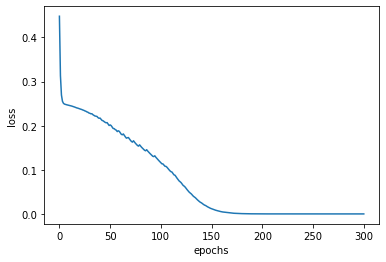

In [17]:
plt.plot(network.loss_history);
plt.xlabel('epochs')
plt.ylabel('loss');

Next, we'll see how the decision boundary looks like:

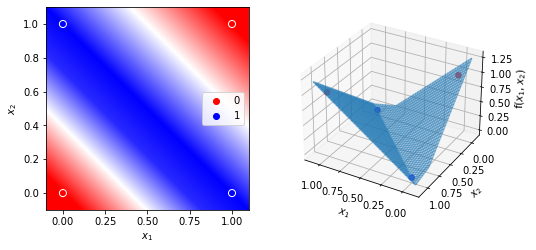

In [18]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

delta = 0.01
xmin=-0.1;xmax=1.1;ymin=-0.1;ymax=1.1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

xs = x_grid.reshape(-1)
ys = y_grid.reshape(-1)
x = np.vstack((xs, ys)).T

Z = np.array([network.decision_function(xx) for xx in x])
Z = Z.reshape(x_grid.shape)

im = ax.imshow(Z, origin='lower',
               cmap=plt.cm.bwr, extent=(xmin,xmax,ymin,ymax), 
               vmin=0, vmax=1)

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([1, 0, 0, 1])

plt.style.use('default')
ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='bwr', edgecolors='w');
ax.plot([], [], 'or', label='0')
ax.plot([], [], 'ob', label='1')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()

ax2.view_init(30, 120)
ax2.plot_wireframe(x_grid, y_grid, Z, alpha=0.5);
ax2.scatter(X[:,0], X[:,1], y, c=y, s=30, alpha=0.7, cmap='bwr')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('f($x_1$, $x_2$)');

### Comments

1. Libraries such as PyTorch and TensorFlow perform automatic differentiation, making it unnecessary to perform differentiation yourself.  These libraries allow for very complex architectures that would have been close to impossible otherwise.  Keras, which is an easy to use interface to TensorFlow, will be presented in a future notebook.

2. There are many more types of neural network layers.  We will discuss a few in upcoming notebooks.

### Pros and cons of feed forward networks

#### Pros

- Highly flexible - you can choose almost every aspect of the architecture:  number of layers, number of neurons per layer, activation function, loss function, initialization, and many more.
- Can provide high accuracy if you choose the right network architecture

#### Cons

- Training on a CPU can take a long time.  Solution:  GPUs/TPUs
- Difficult to interpret
- Many options to tweak means that selecting hyperparameters can be a challenge
- Difficult to get better performance than random forests or support-vector machines.


## References

Rosenblatt, Frank. "The perceptron: a probabilistic model for information storage and organization in the brain." Psychological review 65.6 (1958): 386.

Minsky, Marvin and Seymour Papert. Perceptrons: An Introduction to Computational Geometry.  The MIT Press, 1969.

Rumelhart, David E.; Hinton, Geoffrey E.; Williams, Ronald J. (1986). "Learning Internal Representations by Error Propagation". In Rumelhart, David E.; McClelland, James L. (eds.). Parallel Distributed Processing : Explorations in the Microstructure of Cognition. Volume 1 : Foundations. Cambridge: MIT Press.

### A more vectorized implementation

Below you will find another implementation of the same simple neural network that introduces more vectorized computations.

In [19]:
def ReLU2(x):
    return np.maximum(0, x)

def ReLU_derivative2(x):
    dy = np.ones(x.shape)
    dy[x<0] = 0
    return dy

class neural_network2 :
    def __init__(self, lr=0.01, epochs=100, random_state=42):
        self.lr = lr
        self.epochs = epochs
        self.rng = default_rng(random_state)
        # Initialize the weights to small random values
        self.initialize_weights() 
        self.loss_history = []
        # Use ReLU for the network's activation function
        self.activation_function = ReLU2
        self.activation_deriv = ReLU_derivative2
        
    def initialize_weights(self):
        self.W = self.rng.normal(0, 0.1, (2, 2))
        self.b = self.rng.normal(0, 0.1, (2, 1))
        self.v = self.rng.normal(0, 0.1, (2))
        self.c = self.rng.normal(0, 0.1, 1)
               
    def decision_function(self, X):
        return np.dot(self.v,
            self.activation_function(
                np.dot(self.W, X.T) + self.b)) + self.c
        
    def gradient_step(self, X, y):
        # we are using gradient descent and not SGD
        # so we keep track of the old parameter values
        # in order to avoid updating the weights
        W = np.copy(self.W)
        b = np.copy(self.b)
        v = np.copy(self.v)
        c = np.copy(self.c)
        
        for i in range(X.shape[0]):
            x = X[i]
            # calculate quantities of interest
            pred = np.dot(v, self.activation_function(
                np.dot(W, x).reshape(2, -1) + b)) + c
            loss_derivative = 2*(pred - y[i])
            h1 = self.activation_function(np.dot(W[0], x) + b[0])
            h1_derivative = self.activation_deriv(np.dot(W[0], x) + b[0])
            h2 = self.activation_function(np.dot(W[1], x) + b[1])
            h2_derivative = self.activation_deriv(np.dot(W[1], x) + b[1])

            # update weights using the contribution of example i to the
            # gradient
            self.v[0] -= self.lr*loss_derivative*h1
            self.v[1] -= self.lr*loss_derivative*h2
            self.c -= self.lr*loss_derivative
            self.W[0] -= self.lr*loss_derivative*v[0]*h1_derivative*x
            self.b[0] -= (self.lr*loss_derivative*v[0]*
                          h1_derivative).reshape(-1)
            self.W[1] -= self.lr*loss_derivative*v[1]*h2_derivative*x
            self.b[1] -= (self.lr*loss_derivative*v[1]*
                          h2_derivative).reshape(-1)
  
    def loss(self, X, y):
        return np.mean((self.decision_function(X) - y)**2)
  
    def fit(self, X, y): 
        loss = self.loss(X, y)
        self.loss_history.append(loss)   
        for _ in range(self.epochs):
            self.gradient_step(X, y)
            self.loss_history.append(self.loss(X, y))
         
    def predict(self, X): 
        pred_prob = self.decision_function(X)
        pred_class = np.where(pred_prob >= .5, 1, 0)
        return np.squeeze(pred_class) 


In [20]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([1, 0, 0, 1])

trials  = 9
seed01  = 10
success = False
runs    = 0

for i in range(seed01, seed01+trials) :
    runs += 1
    network = neural_network2(lr=0.05, epochs=300, random_state=i)
    network.fit(X, y)
    acc = np.mean(network.predict(X) == y)
    print(f'Seed: {i} yields training set accuracy: {acc:1.3f}')
    if acc == 1.0 :
        success = True
        break
      
if success :
    print(f'It took {runs} trials to find a perfect solution')
else :
    print(f'No solution was found in {trials} trials')

Seed: 10 yields training set accuracy: 0.750
Seed: 11 yields training set accuracy: 0.750
Seed: 12 yields training set accuracy: 0.500
Seed: 13 yields training set accuracy: 0.500
Seed: 14 yields training set accuracy: 0.750
Seed: 15 yields training set accuracy: 0.500
Seed: 16 yields training set accuracy: 1.000
It took 7 trials to find a perfect solution
